<a href="https://colab.research.google.com/github/SenseiBassa/Nexux-Capstone-1/blob/main/Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bassa, Joshua Samuel  2023 10Alytics Capstone project 1**
>  May 19, 2023



**Customer Segmentation and Deposit Detection system Case Study**
> ##### Bassa, Joshua Samuel, (10Alytics Alumni)

#### Summary
Nexus Bank is a financial institution that aims to provide exceptional banking services tailored to the specific needs and goals of its clients. They offer a wide range of banking solutions and prioritize delivering high-quality service, transparency, and honesty. However, during a recent board meeting, the directors expressed dissatisfaction with the current state of affairs and recognized the need to optimize operations and improve efficiency. As a Data Scientist, the Director of Nexus Bank has reached out for assistance in leveraging data to gain insights into the bank and enhance its performance.
The board wants to analyze customer behavior patterns and trends, particularly focusing on the impact of customer demographics on attitudes towards defaulting, in order to anticipate future customer behavior and determine the likelihood of customer deposits.


### 1. Exploratory Data Analysis

In [ ]:
# Import necessary libraries

# Data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")



### 2. Data Cleaning

In [ ]:
# read/load the Bank dataset
df = pd.read_excel(r"/content/bank.xlsx")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<Axes: >

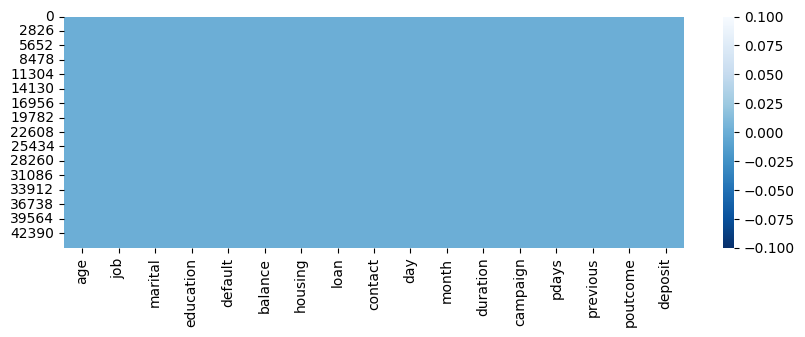

In [ ]:
# Check for missing values in the dataframe
missing_values_count = df.isnull().sum()
print(missing_values_count)

# Visualize missing values using a heatmap
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(),cbar = True, cmap = "Blues_r")

### 2.2 Data Cleaning and Pre-Processing

In [ ]:
# Check for duplicates
print(df.duplicated().sum())


0


### 3. Exploratory Data Analysis
####. Univariate
####. Bivariate
####. Multivariate


### 3.1 Univariate Analysis

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

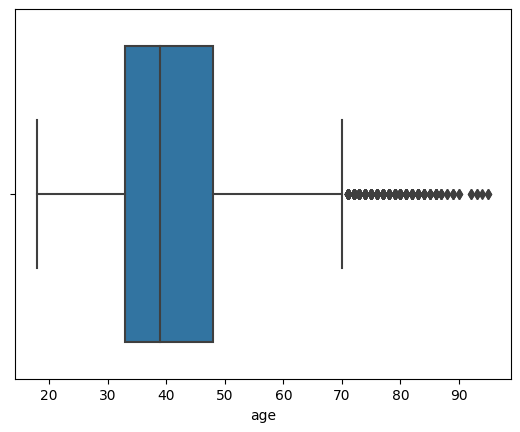

In [ ]:
# Check for outliers
sns.boxplot(x=df["age"]);

### Narration:

#### The plot above has a lot of outliers. Perhaps, I will implore the use of the Interquartile Range.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

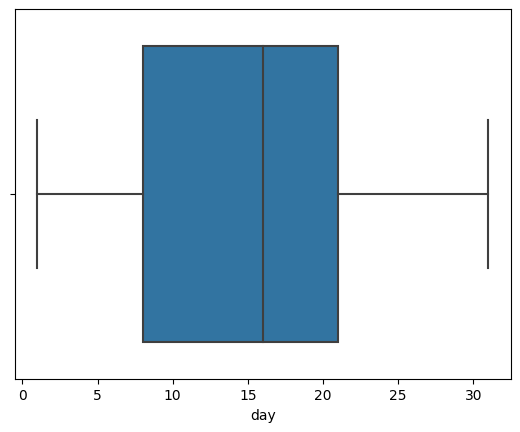

In [ ]:
# Check for outliers
sns.boxplot(x=df["day"]);

### Narration

#### No outlier is found in the plot above.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

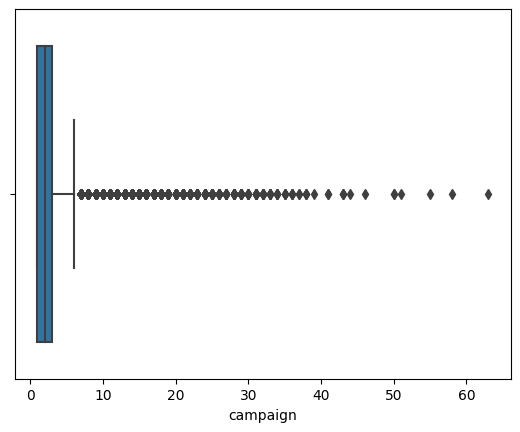

In [ ]:
# Check for outliers
sns.boxplot(x=df["campaign"]);

### Narration

##### The plot above has a lot of outliers

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

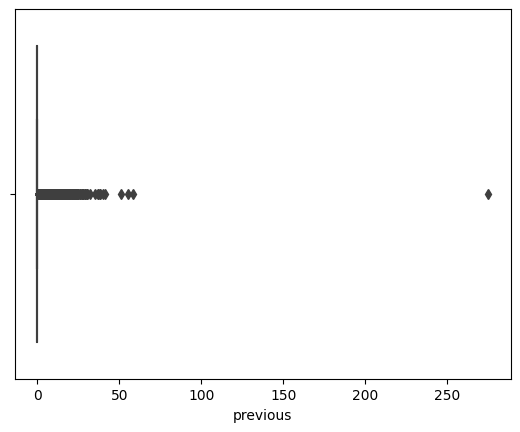

In [ ]:
# Check for outliers
sns.boxplot(x=df["previous"]);

### Narration

#### The plot above has a lot of outliers with no upper quartile and lower quartile range.

#### Bivariate Analysis

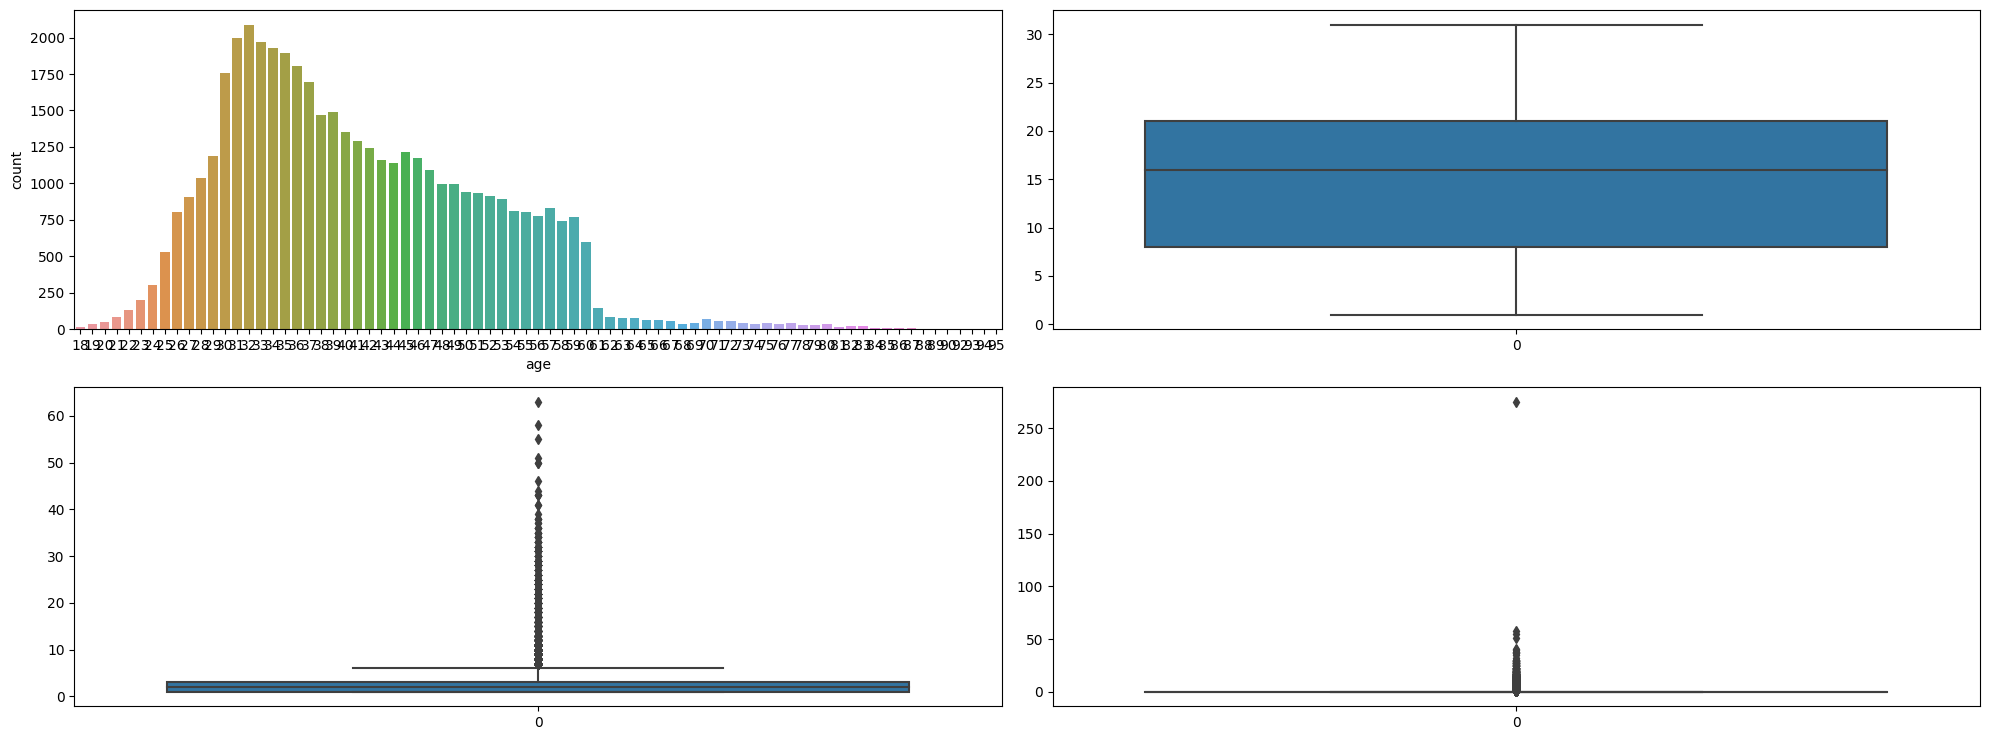

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(x=df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['day'], ax = axs[0,1])
plt3 = sns.boxplot(df['campaign'], ax = axs[1,0])
plt4 = sns.boxplot(df['previous'], ax = axs[1,1])

plt.tight_layout()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in df.columns[1:]:
  if(df[c].dtype=='object'):
    df[c] = encoder.fit_transform(df[c])
  else:
    df[c] = df[c]

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
# Remove CustomerID Column
df.drop('age', axis=1, inplace=True)
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


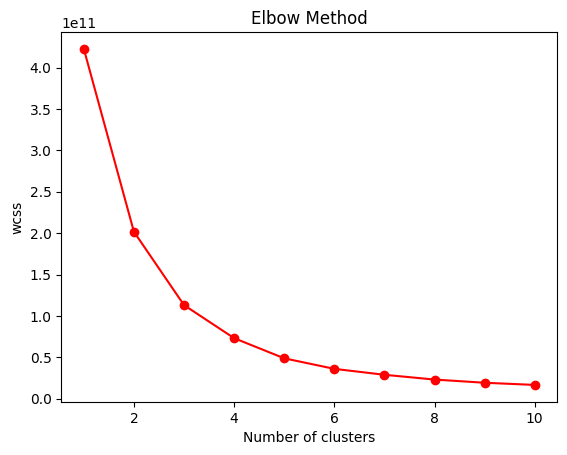

In [ ]:
# Determine optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df)

# Add cluster labels to data
df['Cluster'] = kmeans.labels_

In [ ]:
import matplotlib.pyplot as plt

# Visualize cluster results

plt.scatter(df['Age'], df['day'], c=df['campaign'], label='Centroids')
plt.xlabel('Age')
plt.ylabel('campaign')
plt.legend()
plt.show()


#Calculate silhouette Score - evaluation matrix of the clustering algorthim 0.44 

from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)

KeyError: ignored